<center>
    <h1>The Wizard of Oz</h1>
</center>
<br>

<b>Data mining (47717): Homework 3 - Text Mining </b>

Razi Haj, 205739386

Noa Levitzky, 205970783

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from stop_words import get_stop_words
from nltk.tokenize import PunktSentenceTokenizer
import re

plt.style.use('fivethirtyeight')
FILE_PATH = 'theWoderfulWizardOfOz.txt'
NOUNS_PATH = 'C:/Users/NO1/PycharmProjects/DataMiningEx03/nouns.txt'
STOP_SIGNS = [',', '.', "'", '"', '`', ';', "''", '""', "``", ']', '[', '(',
              ')', ':', "?", "!"]
porter = PorterStemmer()

with open(FILE_PATH, 'r') as file:
    tokens = nltk.word_tokenize(file.read())

In [2]:
# Helper Functions


def stem_sentence(t):
    stem_sentence = []
    for word in t:
        stem_sentence.append(porter.stem(word))
    return stem_sentence


def get_ordered_freq(t):
    frequency = {}
    for word in t:
        if word in STOP_SIGNS:
            continue

        count = frequency.get(word, 0)
        frequency[word] = count + 1

    ordered = {k: v for k, v in reversed(sorted(
        frequency.items(), key=lambda item: item[1]))}
    return ordered


def print_freq(f, num, section):
    print("**** ", section, " ****\nTop 20 tokens are:\n", f,
          "\nTotal number of tokens: ", num, "\n")

    
def select_x_highest(d, num):
    i = 0
    highest_dict = {}

    for k, v in d.items():
        if i < num:
            highest_dict[k] = v
            i += 1
        else:
            return highest_dict

        
# For POS tagging
def process_content(tokenized_text, chunk):
    processed = []
    try:
        for i in tokenized_text:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkParser = nltk.RegexpParser(chunk)
            chunked = chunkParser.parse(tagged)
            for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
                processed.append(subtree)

    except Exception as e:
        print(str(e))
    finally:
        return processed
    
    
def extract_phrases(nltk_chunked_txt):
    phrases = []
    for row in nltk_chunked_txt:
        row_lst = row.leaves()
        word_lst = []
        for word, t in row_lst:
            word_lst.append(word)
        phrases.append(" ".join(word_lst)) 
    return phrases


def extract_words(nltk_chunked_txt):
    phrases = []
    for row in nltk_chunked_txt:
        row_lst = row.leaves()
        for word, t in row_lst:
            phrases.append(word)
    return phrases


def parseSection(f_dict, section, title):
    freq_y = np.array(list(f_dict.values()))
    rank_x = np.arange(1, len(f_dict) + 1)
    fig, axes = plt.subplots()
    axes.loglog(rank_x, freq_y, marker=".", linestyle='None')
    axes.autoscale()
    plt.title(title)
    plt.ylabel('Word Frequency (log)')
    plt.xlabel('Rank (log)')
    res = select_x_highest(f_dict, 20)
    print_freq(res, len(f_dict), section)
    return fig, axes

<h3>(b) Tokenizing the text:</h3>

****  B  ****
Top 20 tokens are:
 {'the': 2948, 'and': 1688, 'to': 1182, 'of': 946, 'a': 857, 'I': 650, 'in': 525, 'was': 509, 'you': 503, 'he': 416, 'her': 403, 'that': 379, 'it': 370, 'Dorothy': 362, 'she': 344, 'they': 338, 'for': 336, 'said': 335, 'with': 319, 'as': 315} 
Total number of tokens:  3926 



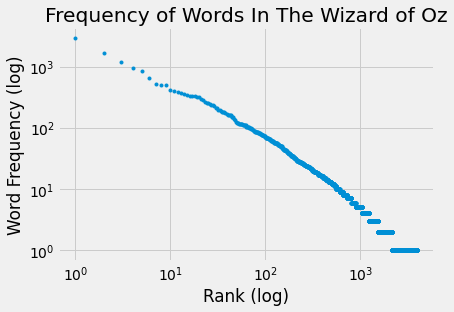

In [3]:
ordered_freq = get_ordered_freq(tokens)
parseSection(ordered_freq, 'B',
             'Frequency of Words In The Wizard of Oz')
plt.show()

<h3>(c) Removing stopwords:</h3>

****  C  ****
Top 20 tokens are:
 {'Dorothy': 362, 'said': 335, 'Scarecrow': 224, 'Woodman': 182, 'Lion': 180, 'will': 164, 'Oz': 164, 'Illustration': 153, 'little': 135, 'one': 120, 'Witch': 120, 'Tin': 118, 'asked': 115, 'great': 115, 'can': 114, 'green': 104, 'came': 103, 'back': 99, 'girl': 94, 'Toto': 94} 
Total number of tokens:  3704 



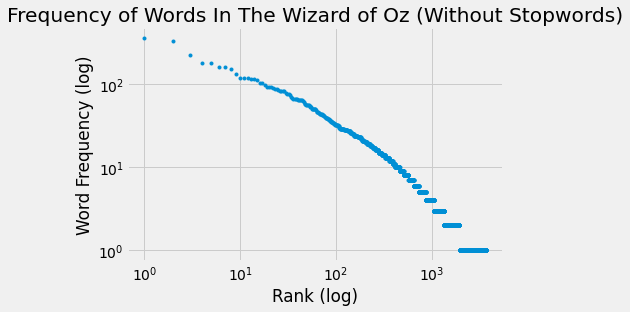

In [4]:
tokens_no_sw = \
    [w for w in tokens if w.lower() not in get_stop_words('english')]
ordered_freq_no_sw = get_ordered_freq(tokens_no_sw)
fig, axes = parseSection(ordered_freq_no_sw, 'C',
             'Frequency of Words In The Wizard of Oz '
             '(Without Stopwords)')
plt.show()

<h3>(d) Stemming  & Removing stopwords:</h3>

****  D  ****
Top 20 tokens are:
 {'dorothi': 363, 'said': 335, 'scarecrow': 226, 'lion': 184, 'woodman': 183, 'will': 169, 'Oz': 164, 'illustr': 154, 'great': 145, 'witch': 143, 'tin': 141, 'ask': 139, 'littl': 136, 'one': 130, 'can': 117, 'work': 108, 'see': 108, 'green': 105, 'head': 103, 'came': 103} 
Total number of tokens:  2569 



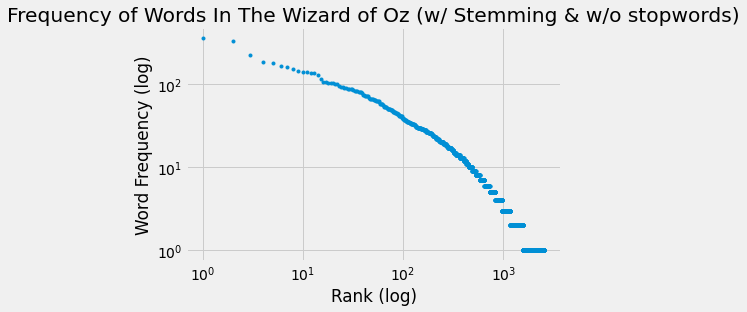

In [5]:
tokens_no_sw_stemmed = stem_sentence(tokens_no_sw)
ordered_freq_no_sw_stemmed = get_ordered_freq(tokens_no_sw_stemmed)
fig, axes = parseSection(ordered_freq_no_sw_stemmed, 'D',
             'Frequency of Words In The Wizard of Oz '
             '(w/ Stemming & w/o stopwords)')
plt.show()

<h3>(e) POS tagging:</h3>

****  E  ****
Top 20 tokens are:
 {'[ Illustration ]': 57, 'little girl': 27, '[ Illustration': 26, 'yellow brick': 18, 'electronic works': 15, 'wicked Witch': 15, 'little man': 12, 'electronic work': 11, 'next morning': 11, 'green whiskers': 9, 'other side': 9, 'many years': 9, '[ Illustration ] [ Illustration': 7, 'great Oz': 7, 'little old woman': 7, 'little woman': 7, 'green girl': 6, 'great Wizard': 6, 'long journey': 6, 'old woman': 5} 
Total number of tokens:  1147 



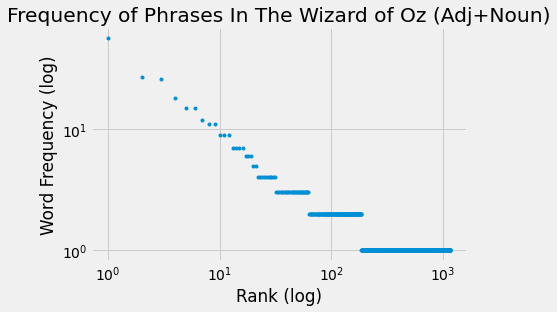

In [6]:
custom_sent_tokenizer = PunktSentenceTokenizer("GWBush.txt")

# JJ|JJR|JJS (one or more), and NN|NNS|NNP|NNPS (one or more)
chunkPattern = r"""Chunk: {<JJ.?>+<NN.?.?>+} """

with open(FILE_PATH, 'r') as file:
    tokenized = custom_sent_tokenizer.tokenize(file.read())

processed = process_content(tokenized, chunkPattern)
phrases = extract_phrases(processed)
phrases_freq = get_ordered_freq(phrases)

fig, axes = parseSection(phrases_freq, 'E',
             'Frequency of Phrases In The Wizard of Oz (Adj+Noun)')
plt.show()

<h3>(f) POS tagging mistake:</h3>

Well, one obvious example is the first 'phrase', "[ Illustration ]", in which NLTK recognized the brackets as an adjective.
But, let's look at another example:

In [7]:
try:
    phrase = "longer prisoners"
    phrases_freq[phrase]
    print("Success! There's a pair of an adjective and a noun which is:", f"'{phrase}'")
except:
    print("Whoops, this pharse does not exists!")

Success! There's a pair of an adjective and a noun which is: 'longer prisoners'


Alas, the original sentence doesn't refer to tall prisoners, but to the phrase "...they were no longer prisoners in a strange land" (see <a href="https://www.gutenberg.org/files/55/55-h/55-h.htm">here</a>).
Although 'no longer' <a href="https://dictionary.cambridge.org/dictionary/english/no-longer?q=no+longer+">is a time adverb</a> (and thus an adjective), it should't have been ommited from the phrase.

<h3>(g) Tag cloud:</h3>

In [8]:
chunkPattern = r"""Chunk: {(<NN.>)} """
processed = process_content(tokenized, chunkPattern)
phrases = extract_words(processed)
phrases_freq = get_ordered_freq(phrases)

with open(NOUNS_PATH, 'w') as f:
    f.write(" ".join(phrases))

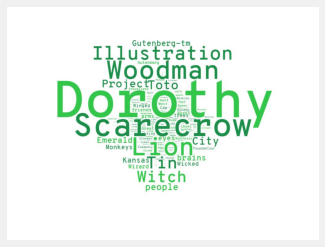

In [9]:
cloud1 = mpimg.imread('WizardOfOzWordCloud.jpg')
plt.axis('off')
cloudplot1 = plt.imshow(cloud1)
cloudplot1.axes.get_xaxis().set_visible(False)
cloudplot1.axes.get_yaxis().set_visible(False)


As we can see, words indeed correspond to The Wizard Of Oz. We can also create another cloud, emitting the top 20 nouns, so we can see the second tier of popularity:

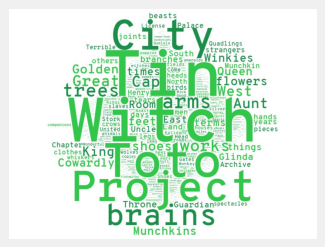

In [10]:
cloud2 = mpimg.imread('WizardOfOzWordCloud_WithoutTop20.jpg')
cloudplot2 = plt.imshow(cloud2)
cloudplot2.axes.get_xaxis().set_visible(False)
cloudplot2.axes.get_yaxis().set_visible(False)


<h3>(h) Regex consecutive words:</h3>

Since reading cosecutive words without context can be confusing, we will present them with their original sentece.

In [11]:
reg = re.compile(r'\b(\w+)[\'\<\>\|\.\?\-\"\,\:\;\[\]\(\)\{\}\\\!\~'
                 r'\@\#\%\^\&\*\s]+\1\b')
repeated = []
with open(FILE_PATH, 'r') as file:
    for line in file:
        if reg.search(line.lower()):
            repeated.append(line.rstrip().lstrip())

print("**** H ****\nConsecutive words " + f"({str(len(repeated))} in total):")
for i, line in enumerate(repeated):
    print(str(i+1) + ':', line)


**** H ****
Consecutive words (11 in total):
1: Illustrator: W. W. Denslow
2: W. W. Denslow.
3: and W. W. Denslow.
4: The little girl gave a cry of amazement and looked about her, her
5: "Neither. He's a--a--a meat dog," said the girl.
6: deer for you. You can roast it by the fire, since your tastes are so
7: speaking to Toto. Toto only wagged his tail; for, strange to say, he
8: street, and Dorothy saw that everything in them was green. Green
9: through the bars of the gate, "I can starve you. You shall have
10: "Or I my brains?" wailed the Scarecrow, wiping the the tears from his
11: far that a current of air struck it and carried it many, many miles
